/home/tangw/Desktop/DPSN
3.0.2


/home/tangw/.conda/envs/python35/lib/python3.5/site-packages/matplotlib/legend.py:503: UserWarning: Unrecognized location "lower up". Falling back on "upper right"; valid locations are
	lower right
	best
	upper center
	lower center
	center
	center left
	lower left
	right
	upper right
	upper left
	center right

  % (loc, '\n\t'.join(self.codes)))
/home/tangw/.conda/envs/python35/lib/python3.5/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


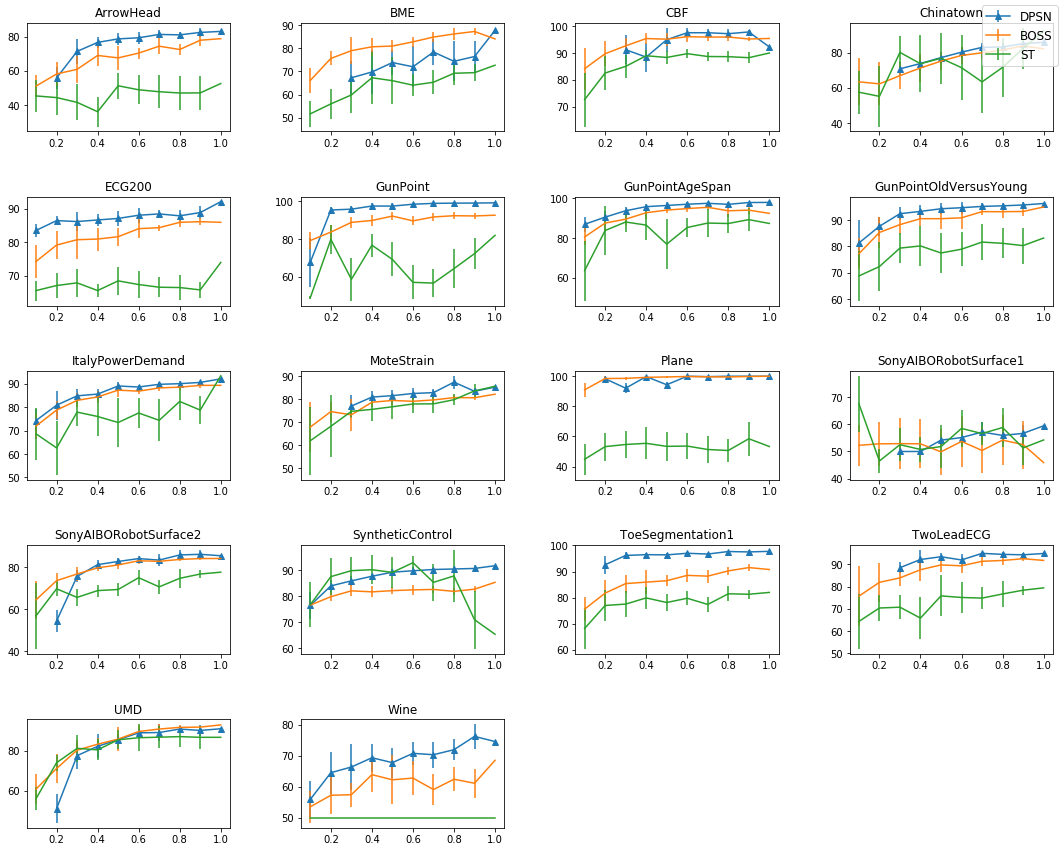

In [2]:
import numpy as np
import os
from os.path import dirname
import matplotlib.pyplot as plt
import matplotlib

#'/home/tangw/Desktop/TSC/BOSS_NN/time_series_proto/test_accuracy_log/'

print(dirname(os.getcwd()))

def big_show_2(big_result,ratio_number_list,fig,ind,title):
    temp = np.reshape(big_result, (4,20, 10))
    temp[temp == 0] = 'nan'
    temp = np.nanmean(temp,axis=1)
    time = 100
    gs = fig.add_gridspec(5, 4)
    #ax1 = fig.add_subplot(5,5,ind+1.5)
    ax1 = fig.add_subplot(gs[0,ind])
    ax1.plot(ratio_number_list[0:-1],temp[0,0:-1]*time,marker ='^')
    ax1.plot(ratio_number_list[0:-1],temp[1,0:-1]*time)
    ax1.plot(ratio_number_list[0:-1],temp[2,0:-1]*time)
    ax1.plot(ratio_number_list[0:-1],temp[3,0:-1]*time)
    ax1.set_title(title)
    #line_labels = ['Prototype', 'BOSS','WEASEL','ST']
    #fig.legend(labels=line_labels,   # The labels for each line
              # loc='lower right',   # Position of legend
               #borderaxespad=0.1, )

def load_ST_result(name,ratio_number_list, ind_number_list,few_shot_acc):
    father_path = dirname(os.getcwd())+'/SFA_Python-master/test/FULL_result_of_ST_and_Weasel/ST_acc_log/' + name
    path = father_path+'/'+name+'_log.txt'
    ratio_dic = covert_list_to_dic(ratio_number_list)
    ind_dic = covert_list_to_dic(ind_number_list)
    proto_result = np.zeros([len(ratio_number_list),len(ind_number_list)])
    try:
        f = open(path, "r")
        for x in f:
            temp = x.split('\t')
            if float(temp[3])==1:
                proto_result[-1:,:] =np.ones((1,len(ind_number_list)))*float(temp[-1])
                continue
            
            proto_result[ratio_dic[float(temp[3])]][ind_dic[float(temp[5])]] = float(temp[-1])
    except:
        print(name,'ST cannot find')
    
    proto_result[proto_result == 0] = np.nan
    return proto_result







def load_WEASEL_result(name,ratio_number_list, ind_number_list,few_shot_acc):
    father_path = dirname(os.getcwd())+'/SFA_Python-master/FULL_result_of_ST_and_Weasel/weasel_acc_log/' + name
    path = father_path+'/'+name+'_log.txt'
    ratio_dic = covert_list_to_dic(ratio_number_list)
    ind_dic = covert_list_to_dic(ind_number_list)
    proto_result = np.zeros([len(ratio_number_list),len(ind_number_list)])
    try:
        f = open(path, "r")
        for x in f:
            temp = x.split('\t')
            if float(temp[3])==1:
                proto_result[-1:,:] =np.ones((1,len(ind_number_list)))*float(temp[-1])
                continue
            
            proto_result[ratio_dic[float(temp[3])]][ind_dic[float(temp[5])]] = float(temp[-1])
    except:
        print(name,'Weassl cannot find')
    proto_result[proto_result == 0] = np.nan
    return proto_result




def BOSS_feature_data_loader(dataset_name,ratio_number,ind_number):
    father_path = dirname(os.getcwd())+'/SFA_Python-master/test/BOSS_feature_Data_pyts/' + dataset_name
    path = father_path+'/'+str(ratio_number)+'/'+str(ind_number)+'/'+dataset_name+'.npy'
    dictionary = np.load(path)
    X_train_feature= dictionary.item().get('X_train_feature')
    y_train = dictionary.item().get('y_train')
    X_test_feature = dictionary.item().get('X_test_feature')
    y_test = dictionary.item().get('y_test')
    test_accuracy = dictionary.item().get('Boss_accuracy')
    return X_train_feature, y_train, X_test_feature, y_test, test_accuracy

def load_BOSS_result(name,ratio_number_list,ind_number_list):
    BOSS_result = np.zeros([len(ratio_number_list),len(ind_number_list)])
    for idx, ratio_number in enumerate(ratio_number_list):
        for idx_i, ind_number in enumerate(ind_number_list):
            if ratio_number == 1:
                ind_number =10
            _, _, _, _, test_accuracy= BOSS_feature_data_loader(name,ratio_number,ind_number)
            BOSS_result[idx,idx_i] = test_accuracy
    
    return BOSS_result





def covert_list_to_dic(XX_list):
    result_dic ={}
    for i,item in enumerate(XX_list):
        result_dic[item]=i
    return result_dic

def load_proto_result(name,ratio_number_list, ind_number_list,few_shot_acc):
    if few_shot_acc ==1:
        path = dirname(os.getcwd())+'/time_series_proto/test_accuracy_log/'+name+'/'+name+'_log.txt'
        
        
    elif few_shot_acc==2:
        path = dirname(os.getcwd())+'/time_series_proto/test_accuracy_log_all_as_proto/'+name+'/'+name+'_log.txt'
    else:
        path = dirname(os.getcwd())+'/time_series_proto/exp/test_accuracy_log/'+name+'_true_acc/'+name+'_log.txt'
    ratio_dic = covert_list_to_dic(ratio_number_list)
    ind_dic = covert_list_to_dic(ind_number_list)
    proto_result = np.zeros([len(ratio_number_list),len(ind_number_list)])
    try:
        f = open(path, "r")
        for x in f:
            temp = x.split('\t')
            if float(temp[3])==1:
                proto_result[-1:,:] =np.ones((1,len(ind_number_list)))*float(temp[-1]) /100
                continue
            
            proto_result[ratio_dic[float(temp[3])]][ind_dic[float(temp[5])]] = float(temp[-1])/100
    except:
        print(name,'cannot find')
    
    proto_result[proto_result == 0] = np.nan
    return proto_result
    
def big_draw(big_avg_result,big_std_result,big_label,fig):
    #grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
    grid = plt.GridSpec(5,5, hspace=0.25, wspace= 0.35)
    
    ax1 = fig.add_subplot(grid[4,2:])
    proto_result= big_avg_result[0:1,:]
    
    x = np.linspace(0, 1, big_avg_result.shape[1])
    y1 = np.amax(big_avg_result[1:,:], axis=0) 
    y2 = np.amin(big_avg_result[1:,:], axis=0) 
    ax1.fill_between(x, y1, y2, where=y2 <= y1,facecolor='red', interpolate=True)
    ax1.plot(x,np.squeeze(proto_result))
    



def data_compare(name,ratio_number_list, ind_number_list,few_shot_acc,fig,subind):
    
    few_shot_result = load_proto_result(name,ratio_number_list, ind_number_list,few_shot_acc)
    mean_list,min_list,max_list,std_list = mean_min_max_std(few_shot_result)
    
      
    BOSS_result = load_BOSS_result(name,ratio_number_list,ind_number_list)
    mean_list2,min_list2,max_list2,std_list2 = mean_min_max_std(BOSS_result)
    
    
#     WEASEL_result = load_WEASEL_result(name,ratio_number_list, ind_number_list,few_shot_acc)
#     mean_list3,min_list3,max_list3,std_list3 = mean_min_max_std(WEASEL_result)
    
    ST_result = load_ST_result(name,ratio_number_list, ind_number_list,few_shot_acc)
    mean_list4,min_list4,max_list4,std_list4 = mean_min_max_std(ST_result)
    
    time = 100
    ax1 = fig.add_subplot(6,4,subind+4)
    ax1.errorbar(ratio_number_list, mean_list*time, std_list*time,marker ='^')
    ax1.errorbar(ratio_number_list, mean_list2*time, std_list2*time)
    #ax1.errorbar(ratio_number_list, mean_list3*time, std_list3*time)
    ax1.errorbar(ratio_number_list, mean_list4*time, std_list4*time)
    ax1.set_title(name)
    
    big_avg_result[0,(subind-1)*10:(subind-1)*10+10]=mean_list
    big_avg_result[1,(subind-1)*10:(subind-1)*10+10]=mean_list2
    #big_avg_result[2,(subind-1)*10:(subind-1)*10+10]=mean_list3
    big_avg_result[3,(subind-1)*10:(subind-1)*10+10]=mean_list4
    
    big_std_result[0,(subind-1)*10:(subind-1)*10+10]=std_list
    big_std_result[1,(subind-1)*10:(subind-1)*10+10]=std_list2
    #big_std_result[2,(subind-1)*10:(subind-1)*10+10]=std_list3
    big_std_result[3,(subind-1)*10:(subind-1)*10+10]=std_list4
    
    big_label[0,(subind-1)*10:(subind-1)*10+10]=ratio_number_list
    
    return big_avg_result,big_std_result,big_label
    

    

def mean_min_max_std(result):
    keepdims= False
    mean_list = result.mean(axis=1,keepdims=keepdims)
    min_list = result.min(axis=1,keepdims=keepdims)
    max_list = result.max(axis=1,keepdims=keepdims)
    std_list = result.std(axis=1,keepdims=keepdims)
    return mean_list,min_list,max_list,std_list

name_list=[
    'ArrowHead',
    'BME',
    'CBF',
    'Chinatown',
    'ECG200',
    'GunPoint',
    'GunPointAgeSpan',
    'GunPointOldVersusYoung',
    'ItalyPowerDemand',
    'MoteStrain',
    'Plane',
    'SonyAIBORobotSurface1',
    'SonyAIBORobotSurface2',
    'SyntheticControl',
    'ToeSegmentation1',
    'TwoLeadECG',
    'UMD',
    'Wine',
  ]




print(matplotlib.__version__)
ratio_number_list =  [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]
ind_number_list = [0,1,2,3,4,5,6,7,8,9]
few_shot_acc = 2
ind = 1
big_avg_result=np.zeros([4,len(name_list)*len(ratio_number_list)])
big_std_result=np.zeros([4,len(name_list)*len(ratio_number_list)])
big_label=np.zeros([1,len(name_list)*len(ratio_number_list)])


fig= plt.figure()
for name in name_list:
    data_compare(name,ratio_number_list, ind_number_list,few_shot_acc,fig,ind)
    ind = ind + 1
    #print(name)
    #print(load_proto_result(name,ratio_number_list, ind_number_list,few_shot_acc))
    #print(load_WEASEL_result(name,ratio_number_list, ind_number_list,few_shot_acc))


#big_draw(big_avg_result,big_std_result,big_label,fig)

#big_show_2(big_avg_result,ratio_number_list,fig,1,'Average Accuracy')
#big_show_2(big_std_result,ratio_number_list,fig,2,'Average STD')

line_labels = ['DPSN', 'BOSS','ST']
fig.legend(labels=line_labels,   # The labels for each line
               loc='lower up',   # Position of legend
               borderaxespad=0.5,
          prop={'size': 12})

fig.subplots_adjust(top=3.5, bottom=0.1,right=2.5, hspace=0.6, wspace= 0.35)
fig.show()
fig.savefig('./image_result/!A.pdf',bbox_inches = 'tight')